In [1]:
#######################################################
#######################################################
#######################################################

## Intro To Visualization In Python: Static Plots - 3 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 1 of Intro to visualization in python - Static Plots for Tasks 1-13
#### Task 1
##### Import the required packages.
##### Set `data_dir` and `plot_dir` to the path of the data/plot directory.
##### Print `data_dir` and `plot_dir`.


In [2]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
data_dir = str(main_dir) + "/data"
plot_dir = str(main_dir) + "/plots"
print(data_dir)
print(plot_dir)



C:\/data
C:\/plots


#### Task 2
##### Read in our dataset called `heart.csv`. Save it as `ex_data`.
##### Print the head of `ex_data`.
##### Subset the data to have numeric and categorical columns
##### Impute the data with mean
##### Convert the non-numeric categorical columns to numeric
#### Result:


In [3]:

ex_data = pd.read_csv("heart.csv")
print(ex_data.head())
# Subset the data
ex_df_subset = ex_data[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP', 'FastingBS', 'Sex', 'HeartDisease', 'ExerciseAngina', 'RestingECG', 'ST_Slope', 'ChestPainType']]

# Set the dataframe equal to the imputed dataset.
ex_data[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP']] = ex_data[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP']].fillna(ex_df_subset.mean())

# Convert the non-numeric categorical columns to numeric
ex_categorical_cols = ['FastingBS', 'Sex', 'HeartDisease', 'ExerciseAngina', 'RestingECG', 'ST_Slope', 'ChestPainType']
for col in ex_categorical_cols:
  unique_len_list = range(len(ex_df_subset[col].unique()))
  unique_val_list = ex_df_subset[col].unique()
  ex_df_subset[col].replace(unique_val_list,unique_len_list,inplace=True)



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  id  
0              N      0.0       Up             0   1  
1              N      1.0     Flat             1   2  
2              N      0.0       Up             0   3  
3              Y      1.5     Flat             1   4  
4              N      0.0       Up             0   5  


C:\Users\624768\AppData\Local\Temp\ipykernel_5104\52466619.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ex_data[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP']] = ex_data[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP']].fillna(ex_df_subset.mean())
C:\Users\624768\AppData\Local\Temp\ipykernel_5104\52466619.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df_subset[col].replace(unique_val_list,unique_len_list,inplace=True)


#### Task 3
##### Group `ex_data` data by the `'FastingBS'` variable. Save as `ex_grouped`.
##### Then group and summarize all the variables by `'FastingBS'` using their means. Save as `ex_grouped_mean` and print.
##### Reset its index and print the result.
#### Result:


In [4]:

ex_col_dict = ex_df_subset.nunique().to_dict()
ex_grouping_col = min(ex_col_dict, key=ex_col_dict.get)
# Group data by variable with min levels.
ex_grouped = ex_df_subset.groupby(ex_grouping_col)

ex_grouped_mean = ex_grouped[['MaxHR', 'Age', 'Cholesterol', 'Oldpeak', 'RestingBP']].mean()
print(ex_grouped_mean)

ex_grouped_mean = ex_grouped_mean.reset_index()
print(ex_grouped_mean)



                MaxHR        Age  Cholesterol   Oldpeak   RestingBP
FastingBS                                                          
0          138.653409  52.481534   214.529830  0.856392  131.680398
1          130.742991  56.897196   147.051402  0.989252  134.752336
   FastingBS       MaxHR        Age  Cholesterol   Oldpeak   RestingBP
0          0  138.653409  52.481534   214.529830  0.856392  131.680398
1          1  130.742991  56.897196   147.051402  0.989252  134.752336


#### Task 4
##### Notice the format of `ex_grouped_mean`. We wish to convert it from wide to long format.
##### Use the `pd.melt()` function and convert it to long format. Save as `ex_grouped_mean_long` and print the result.
#### Result:


In [5]:

ex_grouped_mean_long = pd.melt(ex_grouped_mean,                    #<- wide dataset
                                  id_vars = [ex_grouping_col],     #<- identifying variable
                                  var_name = 'metric',      #<- contains col names of wide data
                                  value_name = 'mean')      #<- contains values from above columns



#### Task 5
##### Now use the `pd.pivot()` function to convert `ex_grouped_mean_long` to wide format.
##### Save as `ex_grouped_mean_wide` and print.
#### Result:


In [6]:

# Melt the long data into wide.
ex_grouped_mean_wide = ex_grouped_mean_long.pivot(
                                                    index = [ex_grouping_col], #<- identifying variable
                                                    columns = 'metric', #<- col names of wide data
                                                    values = 'mean')    #<- values from above columns




#### Task 6
##### Use the `plt.hist()` function to create a simple histogram of `'MaxHR'`.
#### Result:


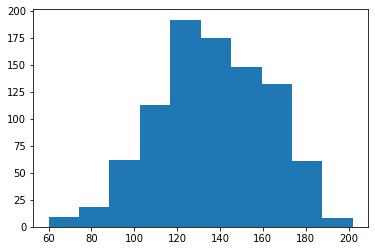

In [7]:

plt.hist(ex_df_subset['MaxHR'])
plt.show()



#### Task 7
##### Now run the same code as above and set the number of bins as 25. 
##### Name the x-axis and the y-axis as `percent_house_below_poverty` and `Frequency` respectively. 
##### Also include the title `Percent House below Poverty Distribution`.
#### Result:


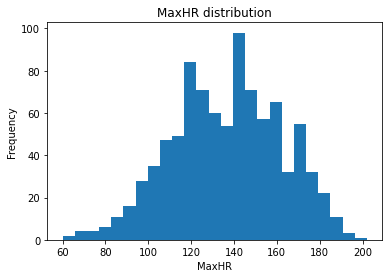

In [8]:

plt.hist(ex_df_subset['MaxHR'], bins = 25)
plt.xlabel('MaxHR')              #<- label x-axis
plt.ylabel('Frequency')        #<- label y-axis
plt.title('MaxHR distribution')  #<- add plot title
plt.show()




#### Task 8
##### Create a simple boxplot of `'MaxHR'` and show the results.
#### Result:


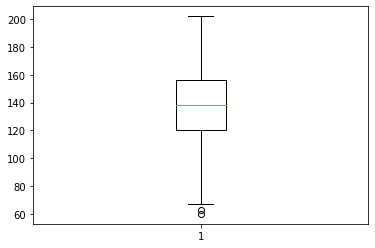

In [9]:
plt.boxplot(ex_df_subset['MaxHR'])
plt.show()



#### Task 9
##### Now try to create the same boxplot by changing its orientation to horizontal.
##### Also label the x-axis and title accordingly.
#### Result:


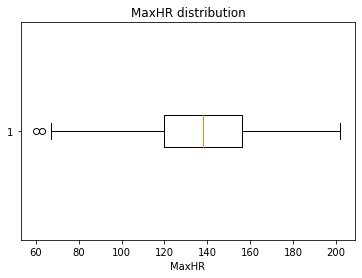

In [10]:
plt.boxplot(ex_df_subset['MaxHR'], vert = False)
plt.xlabel('MaxHR')              #<- label x-axis
plt.title('MaxHR distribution')  #<- add plot title
plt.show()



#### Task 10
##### Now let's create a barplot using the long data `ex_grouped_mean_long`.
##### To do that, first filter `'FastingBS'` by a category and then create two columns in the dataframe: `metrics` and `means`.
##### Save as `ex_true_means` and print.
#### Result:


In [11]:
query = ex_grouping_col + '==' + '0'
ex_true_means = ex_grouped_mean_long.query(query)[['metric','mean']]
print(ex_true_means)



        metric        mean
0        MaxHR  138.653409
2          Age   52.481534
4  Cholesterol  214.529830
6      Oldpeak    0.856392
8    RestingBP  131.680398


#### Task 11
##### Create the following variables needed to construct a bar plot:


- `ex_bar_labels` with the `metric`
- `ex_bar_heights` with the `mean`
- `num_bars` having the length of `ex_bar_heights`
- `ex_bar_positions` having the range of `ex_num_bars`


#### Result:


In [12]:
ex_bar_labels = ex_true_means['metric']   
ex_bar_heights = ex_true_means['mean']    
ex_num_bars = len(ex_bar_heights)
ex_bar_positions = np.arange(ex_num_bars)
print(ex_bar_labels)
print(ex_bar_positions)
print(ex_bar_heights)

    


0          MaxHR
2            Age
4    Cholesterol
6        Oldpeak
8      RestingBP
Name: metric, dtype: object
[0 1 2 3 4]
0    138.653409
2     52.481534
4    214.529830
6      0.856392
8    131.680398
Name: mean, dtype: float64


#### Task 12
##### Create a basic bar chart with the variables above. 
##### Label the title and y-axis accordingly. 
##### Add the title "Exercise Means".
#####  Rotate the labels to a vertical position ( set `rotation`= 90 ) to make them easier to read.
#### Result:


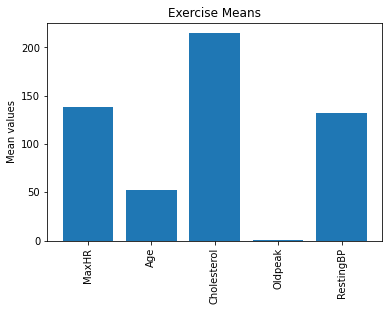

In [13]:

plt.bar(ex_bar_positions, ex_bar_heights)
plt.xticks(ex_bar_positions, ex_bar_labels, rotation = 90)
plt.ylabel('Mean values')
plt.title('Exercise Means')  #<- add plot title
plt.show()



#### Task 13
##### Plot the above bar chart, this time by adjusting the size of the figure.
##### Use the `plt.figsize()` to set the width as `20` and the height as `15`.
#### Result:


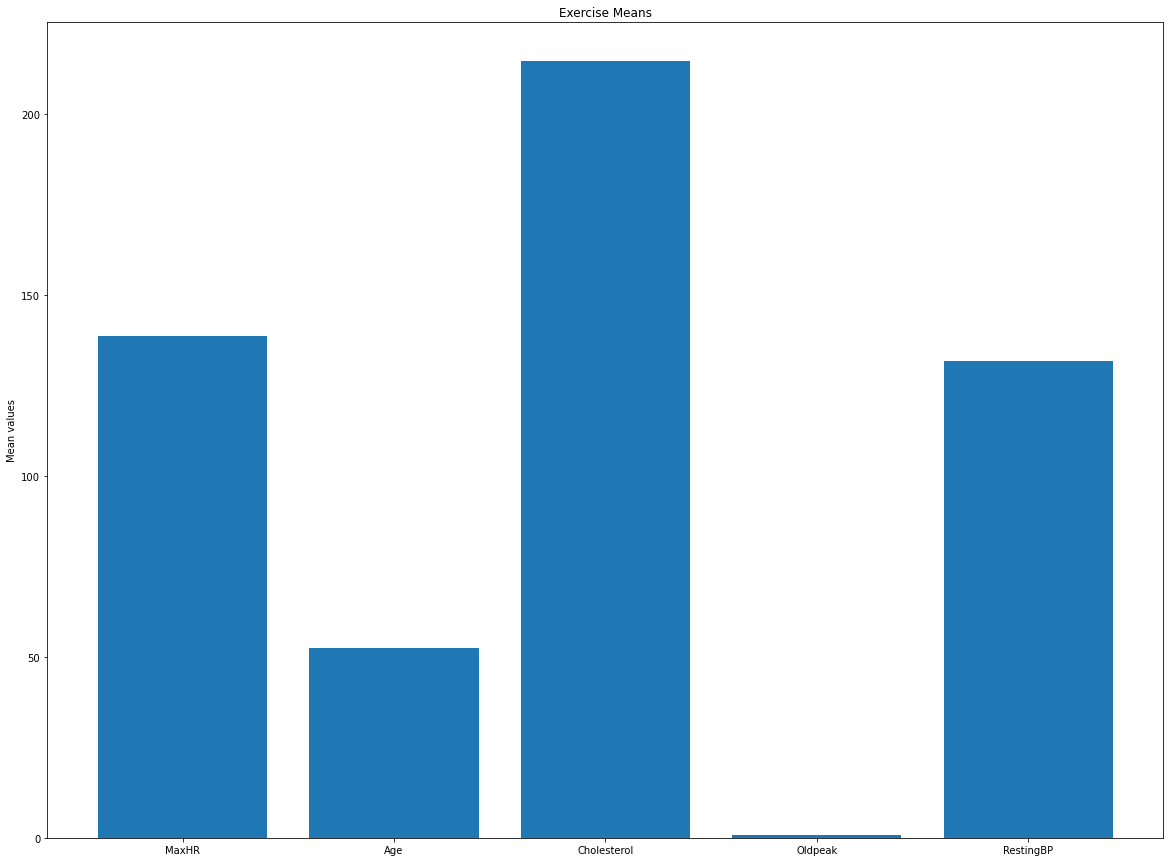

In [14]:
# Adjust figure size before plotting.
plt.figure(figsize = (20, 15)) 
plt.bar(ex_bar_positions, ex_bar_heights)
plt.xticks(ex_bar_positions, ex_bar_labels)
plt.ylabel('Mean values')
plt.title('Exercise Means')  #<- add plot title
plt.show()



#### Please refer to module 2 of Intro to visualization in python - Static Plots for Tasks 14-18
#### Task 14
##### Create a simple scatterplot with `'MaxHR'` on the x-axis and `'MaxHR'` on the y-axis.
#### Result:


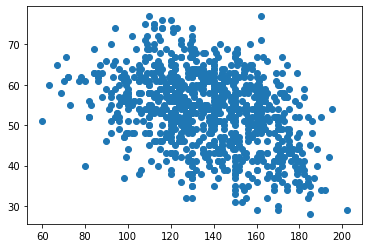

In [15]:
plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'])
plt.show()



#### Task 15
##### Plot the above scatterplot and name the axes and title accordingly.
##### Set the marker to `X` and view the plot.
#### Result:


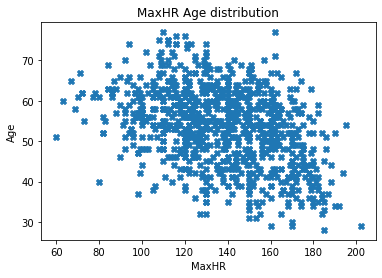

In [16]:
plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
           marker = 'X')
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()


#### Task 16
##### Customize the following graphs and view the plots as mentioned below:


- Histogram of variable `'MaxHR'` and color `lightcoral` 
- Above bar chart  using color `thistle` using the `plt.figsize()` to set the width as `20` and the height as `15`.
- Above scatterplot of `'MaxHR'` on the x-axis and `'Age'` on the y-axis using color `firebrick`


#### Result:


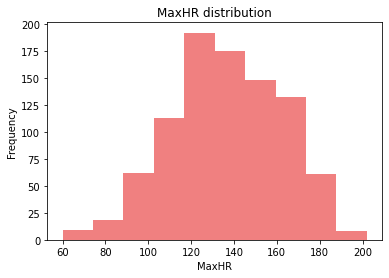

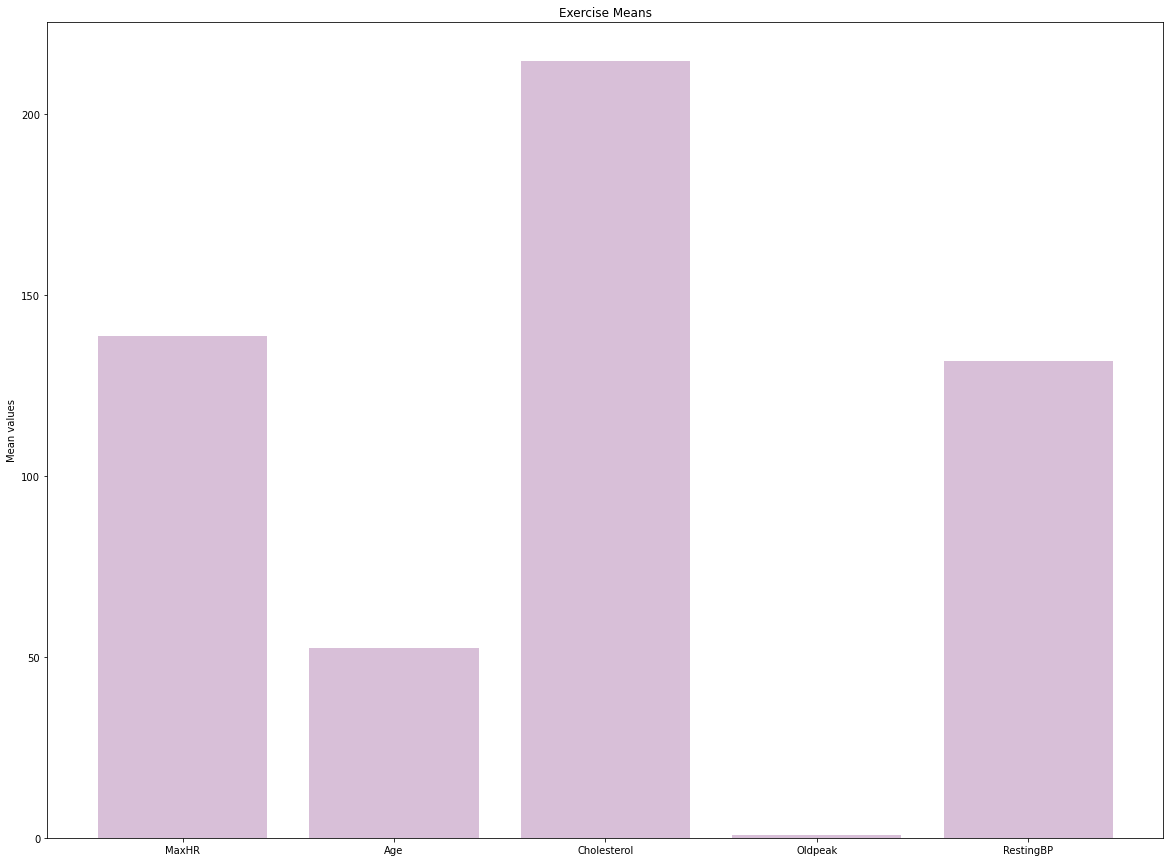

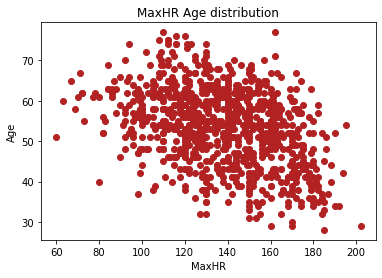

In [17]:
plt.hist(ex_df_subset['MaxHR'], facecolor = 'lightcoral')
plt.xlabel('MaxHR')              #<- label x-axis
plt.ylabel('Frequency')        #<- label y-axis
plt.title('MaxHR distribution')  #<- add plot title
plt.show()

plt.figure(figsize = (20, 15)) 
plt.bar(ex_bar_positions, ex_bar_heights, color = "thistle")
plt.xticks(ex_bar_positions, ex_bar_labels)
plt.ylabel('Mean values')
plt.title('Exercise Means')  #<- add plot title
plt.show()

plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
           c = "firebrick")
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()



#### Task 17
##### Create a color dictionary called `ex_color_dict` corresponding with `'FastingBS'`:
##### - '0' corresponding to color `darkorange`
##### - '1' corresponding to color `skyblue`
##### Set the color as `ex_color_dict` and create a scatterplot with the same parameters `'MaxHR'` and `'Age'`.
##### Then, change the opacity using `alpha` to 0.6.
#### Result:


0    darkorange
1    darkorange
2    darkorange
3    darkorange
4    darkorange
Name: FastingBS, dtype: object


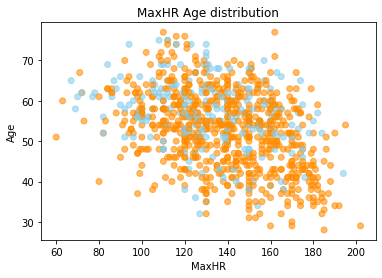

In [18]:
ex_color_dict = {int('0'): 'darkorange', 
                 int('1'): 'skyblue'}
color = ex_df_subset['FastingBS'].map(ex_color_dict)
print(color.head())


plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
            c = color,
            alpha = 0.6)
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()




#### Task 18
##### Print the available pre-defined styles provided by `matplotlib`.
##### Set the style to ` seaborn-darkgrid` .
##### Construct the scatterplot above.
##### Run the scatterplot again, this time setting the labels using `.rcParams` as:
##### - label size as 20
##### - label color as red
##### - figure title size as 15
##### Reset the `rcParams` to default.


#### Result:


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


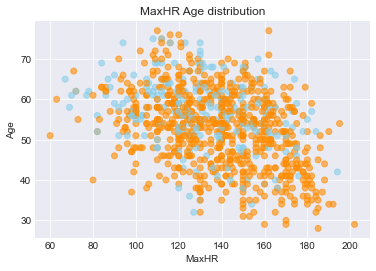

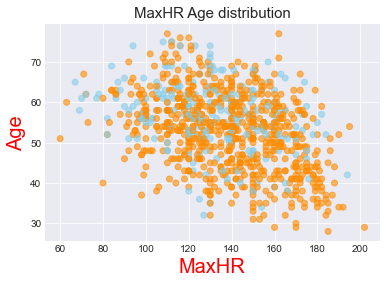

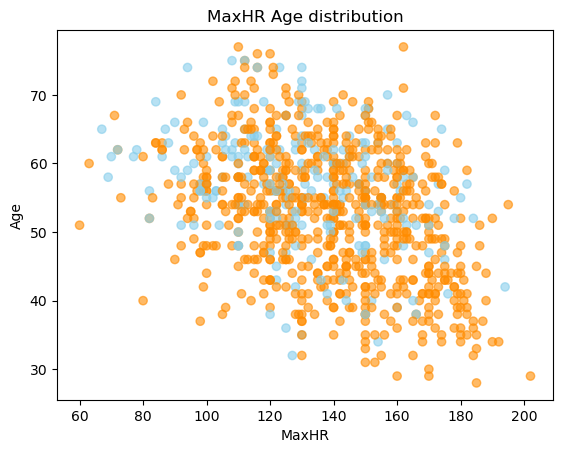

In [19]:

# Print all available styles.
print(plt.style.available)
plt.style.use('seaborn-darkgrid')
# Use seaborn-darkgrid style in matplotlib.
plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
            c = color,
            alpha = 0.6)
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelcolor'] = 'red'
plt.rcParams['axes.titlesize'] = 15

plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
            c = color,
            alpha = 0.6)
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()

plt.rcdefaults()

plt.scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'],
            c = color,
            alpha = 0.6)
plt.xlabel('MaxHR')                
plt.ylabel('Age')
plt.title('MaxHR Age distribution') 
plt.show()



#### Please refer to module 3 of Intro to visualization in python - Static Plots for Tasks 19-24
#### Task 19
##### Create a simple violin plot of `percent_dependent` and show the results.
#### Result:


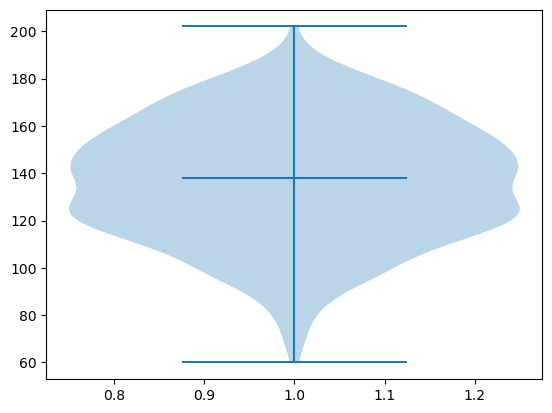

In [20]:

plt.violinplot(ex_df_subset['MaxHR'],
               showmeans=False,  
               showmedians=True)
plt.show()



#### Task 20
##### Now try to create the same violin plot by changing its orientation to horizontal.
##### Also label the x-axis and title accordingly.


#### Result:


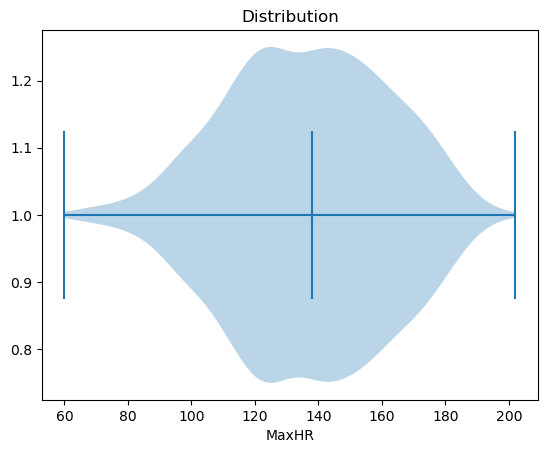

In [21]:

plt.violinplot(ex_df_subset['MaxHR'], vert = False, showmeans=False, showmedians=True)
plt.xlabel('MaxHR')     #<- label x-axis
# Add plot title
plt.title('Distribution')  
plt.show()



#### Task 21
##### Use the `plt.subplots()` function and `ex_df_subset` data to create a 2x2 subplot of the following histogram, boxplot, scatterplot, and barplot:


- Histogram: Create a histogram on `'MaxHR'` and change face color to `lightcoral`
- Boxplot: Create a box plot on `'MaxHR'`
- Scatter plot: Create a scatterplot with the parameters `'MaxHR'` and `'Age'`.
  - Set the scatterplot specifications similar to Task 14.
- Bar chart:
  - Create a bar chart with the same specifications as Task 10 and set the color to `thistle`



##### Hint: If the output does not render, then try to run the code in a single cell.


#### Result:


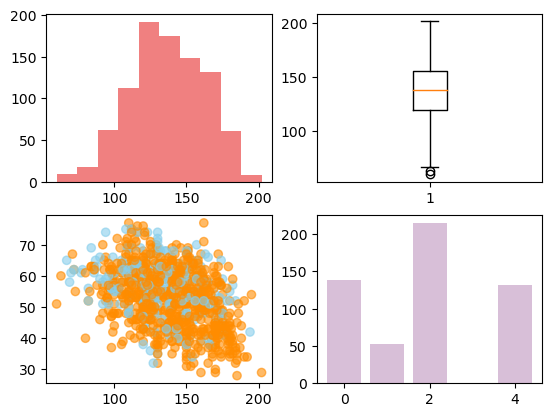

In [22]:

fig, axes = plt.subplots(2, 2)
# 1. Histogram
axes[0, 0].hist(ex_df_subset['MaxHR'], facecolor = 'lightcoral')

# 2. Boxplot
axes[0, 1].boxplot(ex_df_subset['MaxHR'])

# 3. Scatter
axes[1, 0].scatter(ex_df_subset['MaxHR'],
            ex_df_subset['Age'], c = color, alpha = 0.6)

# 4. Barchart
axes[1, 1].bar(ex_bar_positions, ex_bar_heights, color = "thistle")
plt.show()




#### Task 22
##### Create the above plot by labeling the axes of each of the four plots using `.set_xlabel()` and `.set_ylabel()`.
##### Set the ticks for the bar chart using `.set_ticks()`.
##### Also set the labels for ticks using `.set_ticklabels()` making sure the labels are rotated to a vertical position ( set `rotation`= 90 ).
##### Set the default parameters as:


- axes label size as 10
- title size as 25
- size inches as 18 and 7.7
- Title as `Exercise Data Summary`



##### Run the code in a single cell if the plot doesn't show.


#### Result:


C:\Users\624768\AppData\Local\Temp\ipykernel_5104\1620314493.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].xaxis.set_ticklabels([""])


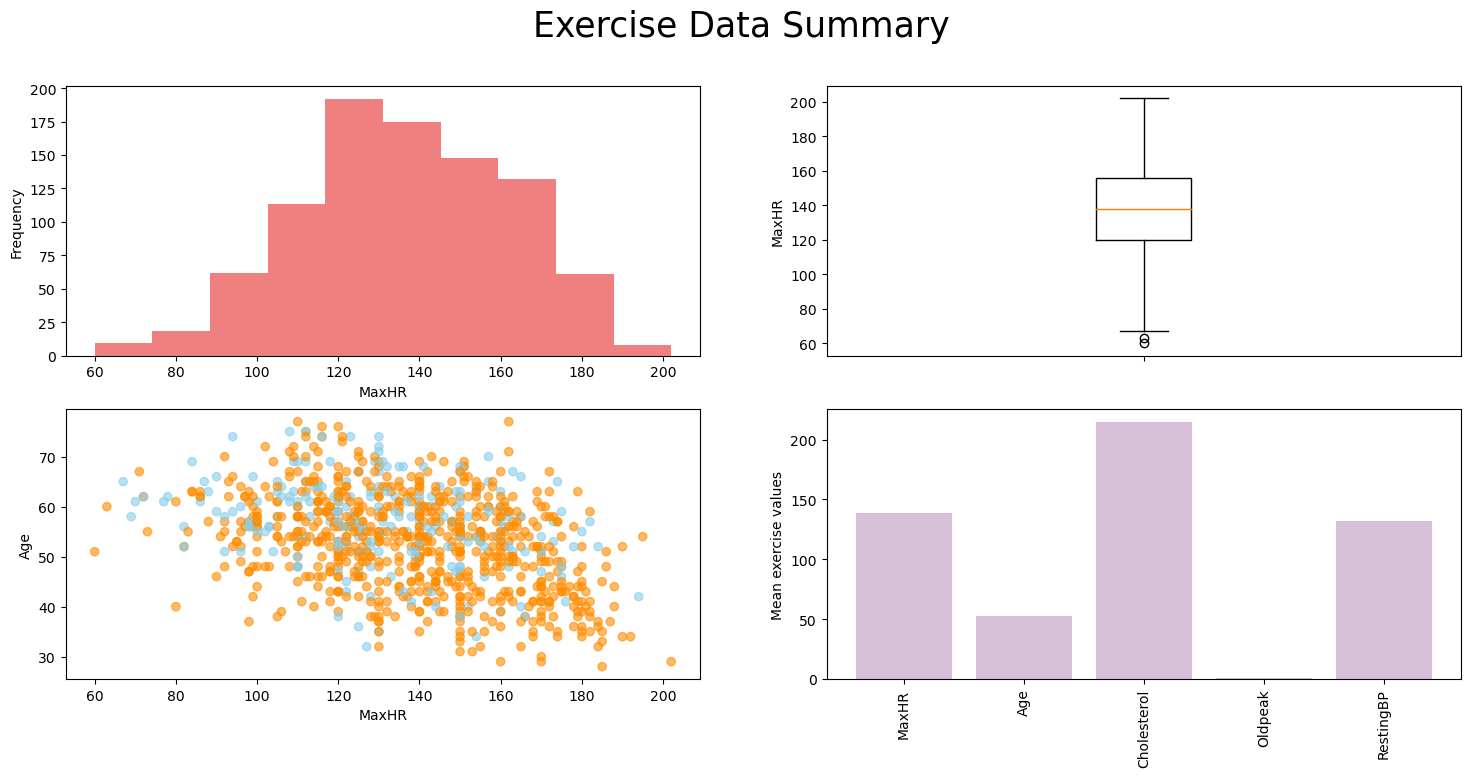

In [23]:

fig, axes = plt.subplots(2, 2, figsize = (15,20)) 

# 1. Histogram 
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlabel('MaxHR')

# 2. Boxplot 
axes[0, 1].set_ylabel('MaxHR')

# 3. Scatterplot.
axes[1, 0].set_xlabel('MaxHR')
axes[1, 0].set_ylabel('Age')

# Mean values of categories of variable means. 
axes[1, 1].set_ylabel('Mean exercise values')


# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])
# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(ex_bar_positions)

# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(ex_bar_labels,rotation=90)

plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.titlesize'] = 25
fig.set_size_inches(18, 7.7)
fig.suptitle('Exercise Data Summary')

axes[0, 0].hist(ex_df_subset['MaxHR'],facecolor = 'lightcoral')
axes[0, 1].boxplot(ex_df_subset['MaxHR']) 
axes[1, 0].scatter(ex_df_subset['MaxHR'],ex_df_subset['Age'], c = color,alpha = 0.6)
axes[1, 1].bar(ex_bar_positions, ex_bar_heights, color = "thistle")

plt.show()


#### Task 23
##### Let's create a multiple layered scatterplot using the `plt.subplots()` function.
##### Define the `key` and `value` for the color dictionary `ex_color_dict`. 
##### Set the 'FastingBS' as `Category 1` and `Category 2` for the different categories present in it respectively.
##### View the plot.
##### Hint: It's always better to clear the plotting area before rendering a new plot by using `plt.clf()`.


#### Result:


<Figure size 640x480 with 0 Axes>

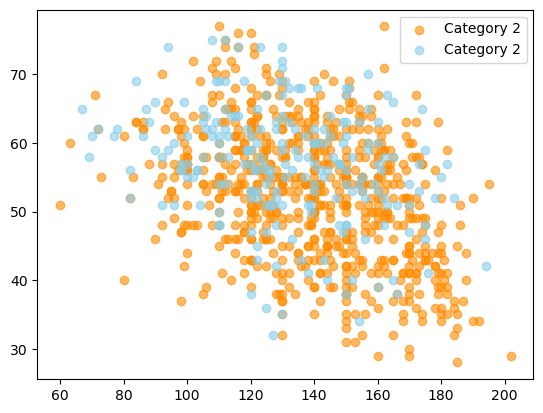

In [24]:

plt.clf()                  #<- clear plotting area
fig, axes = plt.subplots() #<- create a new figure and axes objects for plotting

for key, value in ex_color_dict.items():
    query= 'FastingBS'+'=='+str(key)
    ex_sc_col_1 = ex_df_subset.query(query)['MaxHR']
    ex_sc_col_2 = ex_df_subset.query(query)['Age']

    if key == '0':
        Flag = "Category 1"
    else:
        Flag = "Category 2"

    axes.scatter(ex_sc_col_1, 
                 ex_sc_col_2, 
                 c = value, 
                 label = Flag,
                 alpha = 0.6)
axes.legend()  #<- add a legend that would automatically get labels and colors from layers!   




#### Task 24
##### Create a layered bar chart using the variables from the dataset.
##### Find the means of the data when 'FastingBS' is '1' and save as `ex_false_means`.
##### Find the bar heights for both '0' and '1' levels of 'FastingBS'.
##### Also define the other variables `bar_labels`, `num_bars`, `bar_position` and `width` necessary for a bar chart.
##### Clear the plotting area for a new plot and use `plt.subplot()` to visualize the bar chart.


#### Result:


        metric        mean
0        MaxHR  138.653409
2          Age   52.481534
4  Cholesterol  214.529830
6      Oldpeak    0.856392
8    RestingBP  131.680398
        metric        mean
1        MaxHR  130.742991
3          Age   56.897196
5  Cholesterol  147.051402
7      Oldpeak    0.989252
9    RestingBP  134.752336


<Figure size 640x480 with 0 Axes>

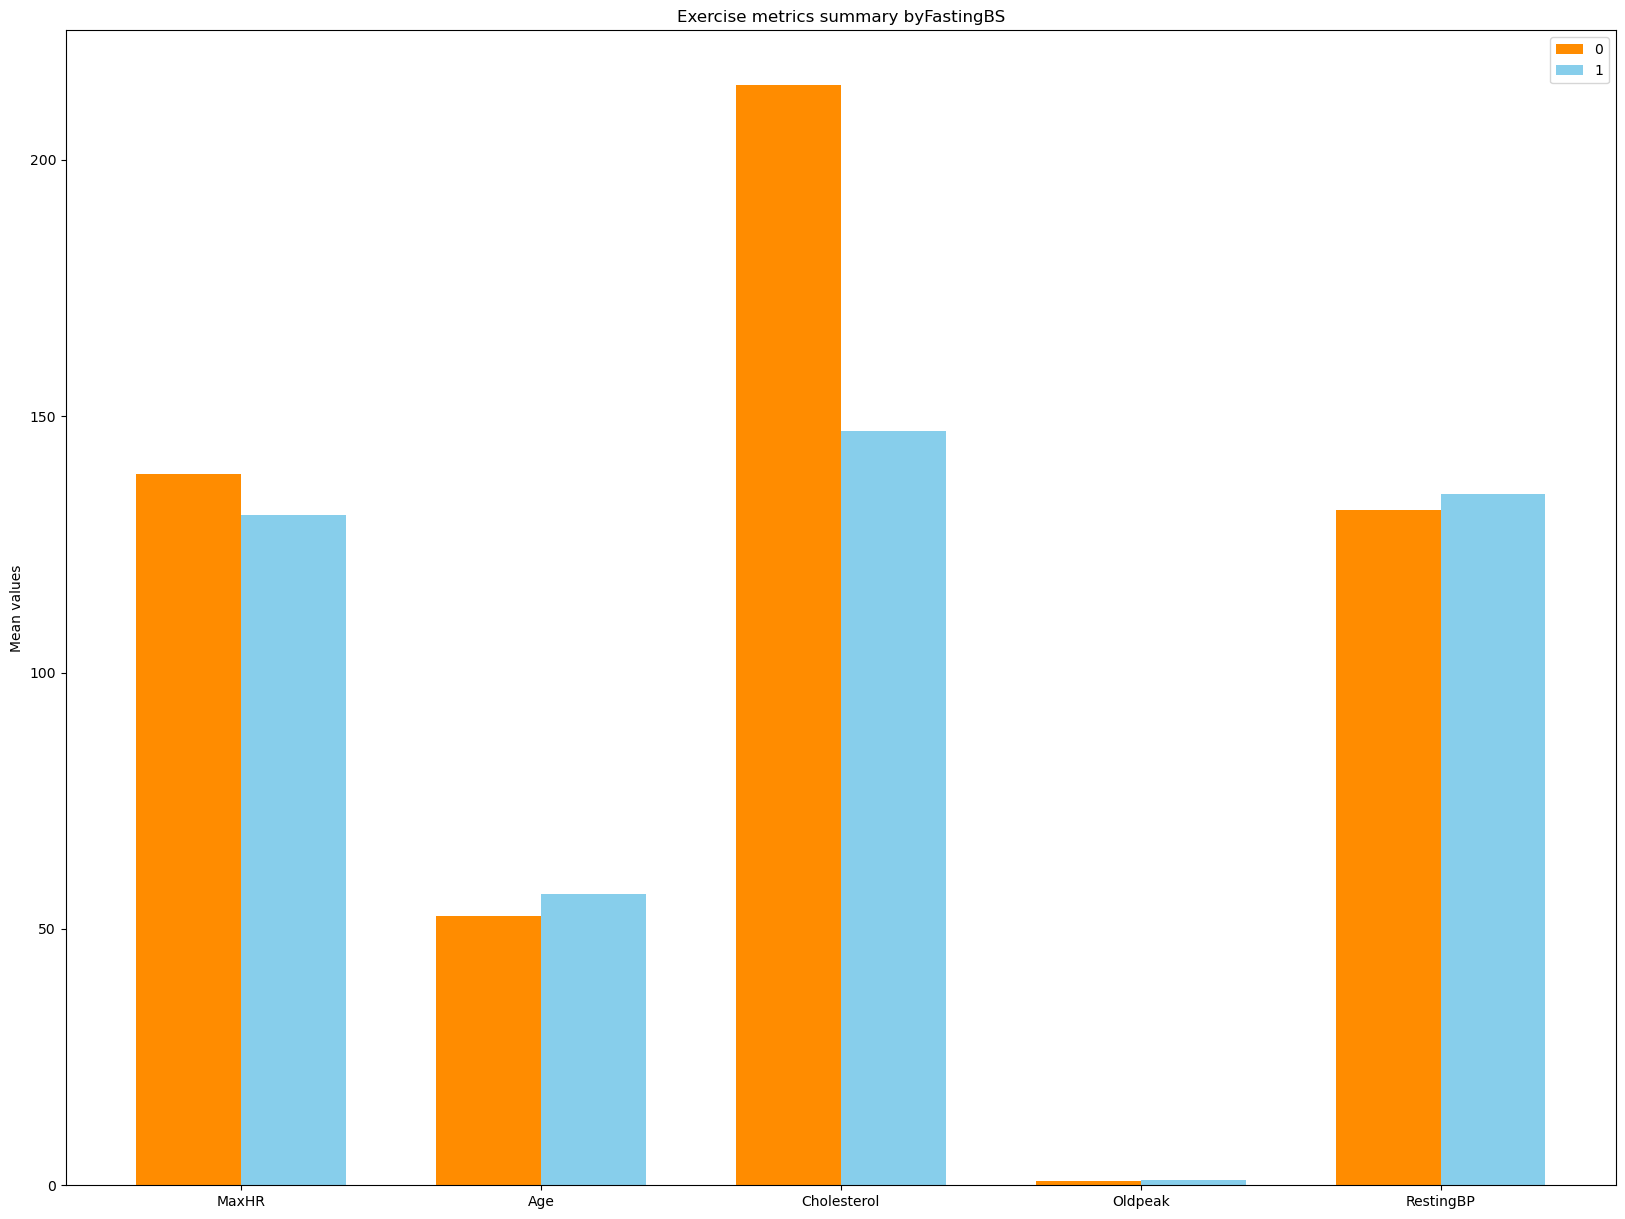

In [25]:

# We already have 'FastingBS' mean data for a category.
print(ex_true_means)

# Let's get the mean data for the other category in 'FastingBS'
query = 'FastingBS' + '==' + '1'
ex_false_means = ex_grouped_mean_long.query(query)[['metric','mean']]
print(ex_false_means)

# Mean values for 'FastingBS' = '0' data.
ex_category_1_bar_heights = ex_true_means['mean'] 
# Mean values for 'FastingBS' = '1' data.
ex_category_2_bar_heights = ex_false_means['mean']
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = ex_false_means['metric'] 
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)       
width = 0.35

plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

ex_category_1_bar_chart = axes.bar(bar_positions,          #<- set bar positions
                            ex_category_1_bar_heights,     #<- set bar heights
                            width,                 #<- set width of the bars
                            color = ex_color_dict[int('0')]) #<- set color to corresponding to '0' in dictionary
ex_category_2_bar_chart = axes.bar(bar_positions + width, #<- set bar positions 
                          ex_category_2_bar_heights,      #<- set bar heights
                          width,                 #<- set width of the bars
                          color = ex_color_dict[int('1')]) #<- set 


# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Exercise metrics summary by' + str('FastingBS'))
axes.set_xticks(bar_positions + width/2)

axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend((ex_category_1_bar_chart, ex_category_2_bar_chart), (int('0'), int('1')))

# Adjust figure size.
fig.set_size_inches(20, 15)
plt.show()


